# Optimization via Gradient Descent

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-3:
            break
    return alpha

In [4]:
def gd(fn, grad_fn, x0, k_max, tol_f, tol_x, alpha=None):
    curr_x, prev_x = x0, np.inf
    curr_k = 0
    grad_x0, curr_grad = grad_fn(x0), grad_fn(curr_x)
    history_x = [x0]
    history_f = [fn(x0)]
    history_grad = [grad_x0]
    history_err = [np.linalg.norm(grad_x0, 2)]
    use_backtracking = alpha is None

    while (curr_k < k_max and 
            not (np.linalg.norm(curr_grad, 2) < tol_f*np.linalg.norm(grad_x0, 2)) and
            not (np.linalg.norm(curr_x - prev_x, 2) < tol_x)):
        if use_backtracking:
            alpha = backtracking(fn, grad_fn, curr_x)
        prev_x = curr_x
        curr_x = curr_x - alpha*grad_fn(curr_x)

        curr_grad = grad_fn(curr_x)
        curr_k += 1
        
        history_x.append(curr_x)
        history_f.append(fn(curr_x))
        history_grad.append(curr_grad)
        history_err.append(np.linalg.norm(curr_grad, 2))

    return history_x, curr_k, history_f, history_grad, history_err

In [5]:
def runTestCase(fn, grad_fn, x_true, x0, k_max, tol_f, tol_x, alpha=None):
    history_x, curr_k, history_f, history_grad, history_err = gd(fn, grad_fn, x0, k_max, tol_f, tol_x, alpha)
    
    print(f"Iterations: {curr_k} | Prediction: {history_x[-1]}")
    if x_true is not None:
        print(f"Rel. error: {np.linalg.norm(history_x[-1] - x_true) / np.linalg.norm(x_true)}")

    plt.plot(range(len(history_err)), history_err)
    plt.title("Gradient norm")
    plt.show()

In [6]:
def testCase1():
    def f(x):
        x1, x2 = x
        return (x1 - 3)**2 + (x2 - 1)**2

    def grad_f(x):
        x1, x2 = x
        return np.array([ 2*(x1-3), 2*(x2-1) ])
    
    return f, grad_f, np.array([3, 1]), 2


def testCase2():
    def f(x):
        x1, x2 = x
        return 10*(x1 - 1)**2 + (x2 - 2)**2

    def grad_f(x):
        x1, x2 = x
        return np.array([ 20*(x1-1), 2*(x2-2) ])
    
    return f, grad_f, np.array([1, 2]), 2


def testCase3(n=5):
    x_true = np.ones((n,))
    A = np.vander(np.linspace(0, 1, n))
    b = A @ x_true

    def f(x):
        return (1/2) * np.linalg.norm(A@x - b, 2)**2

    def grad_f(x):
        return -(b.T @ A - x.T @ A.T @ A)
    
    return f, grad_f, x_true, n


def testCase4(n=5, lamb=0.1):
    x_true = np.ones((n,))
    A = np.vander(np.linspace(0, 1, n))
    b = A @ x_true

    def f(x):
        return (1/2)*np.linalg.norm(A@x - b, 2)**2 + (lamb/2)*np.linalg.norm(x)**2

    def grad_f(x):
        return -(b.T @ A - x.T @ A.T @ A) + lamb*x.T
    
    return f, grad_f, x_true, n


def testCase5():
    def f(x):
        return x**4 + x**3 - 2*x**2 - 2*x

    def grad_f(x):
        return 4*x**3 + 3*x**2 - 4*x - 2
    
    return f, grad_f, None, 1

Iterations: 304 | Prediction: [0.93875981 0.96196123 0.9904538  1.01982843 1.00244065]
Rel. error: 0.033727027437548705


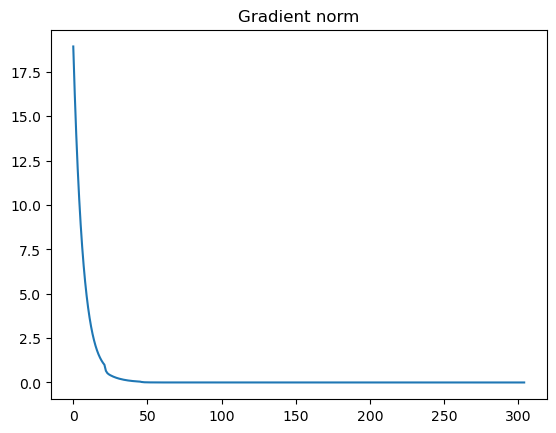

In [7]:
f, grad_f, x_true, in_size = testCase4()
runTestCase(f, grad_f, x_true, np.zeros((in_size,)), 1000, 1e-10, 1e-10, None)

## Non-convex function

In [8]:
f, grad_f, x_true, in_size = testCase5()

[]

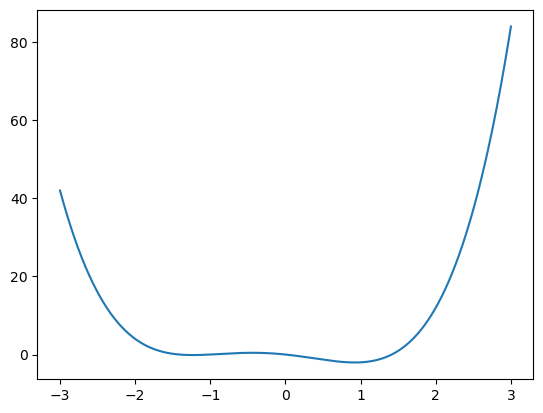

In [9]:
x_axis = np.linspace(-3, 3, 1000)
y_axis = f(x_axis)
plt.plot(x_axis, y_axis)
plt.plot()

Iterations: 153 | Prediction: [-1.23223962]


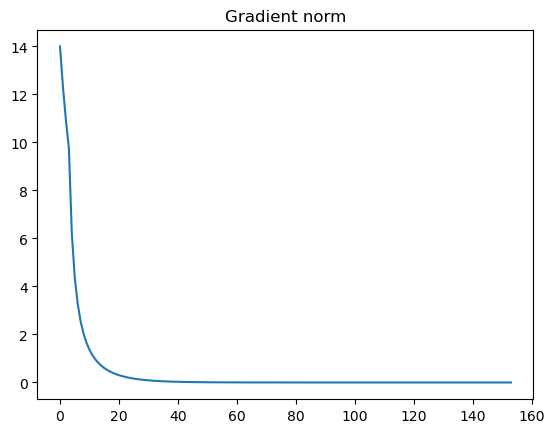

Iterations: 97 | Prediction: [0.9222248]


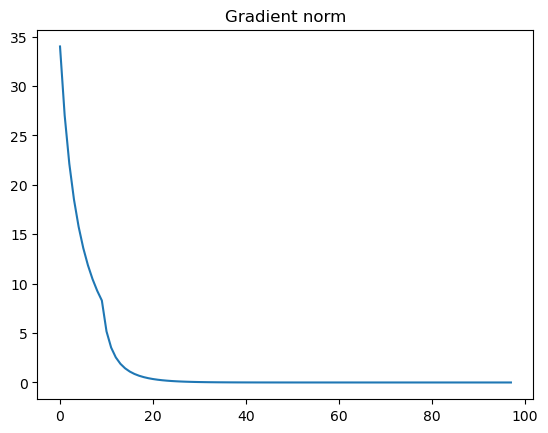

Iterations: 93 | Prediction: [0.92222479]


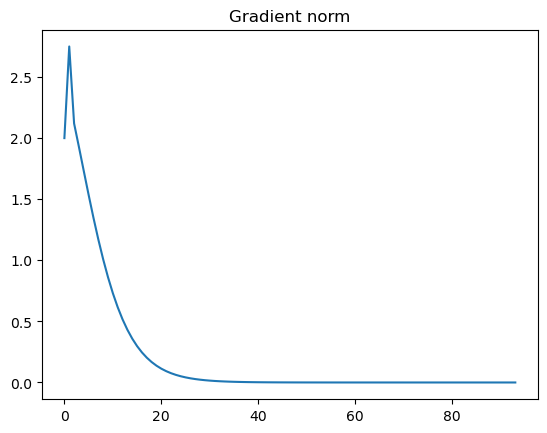

In [10]:
runTestCase(f, grad_f, x_true, np.array([-2]), 1000, 1e-10, 1e-10, None)
runTestCase(f, grad_f, x_true, np.array([2]), 1000, 1e-10, 1e-10, None)
runTestCase(f, grad_f, x_true, np.array([0]), 1000, 1e-10, 1e-10, None)

In [20]:
def showContour(fn, grad_fn, x_true, x0, k_max, tol_f, tol_x, alpha=None):
    history_x, curr_k, history_f, history_grad, history_err = gd(fn, grad_fn, x0, k_max, tol_f, tol_x, alpha)

    x = np.linspace(-10, 10, 1000)
    y = np.linspace(-10, 10, 1000)
    x_contour, y_contour = np.meshgrid(x, y)
    z_contour = fn((x_contour, y_contour))

    history_f.sort()
    plt.contour(x, y, z_contour)
    # plt.contour(x, y, z_contour, levels=history_f)
    plt.scatter([a[0] for a in history_x], [a[1] for a in history_x])
    plt.scatter(x_true[0], x_true[1], marker="x", c="red", label="Optima")
    plt.legend()
    plt.show()

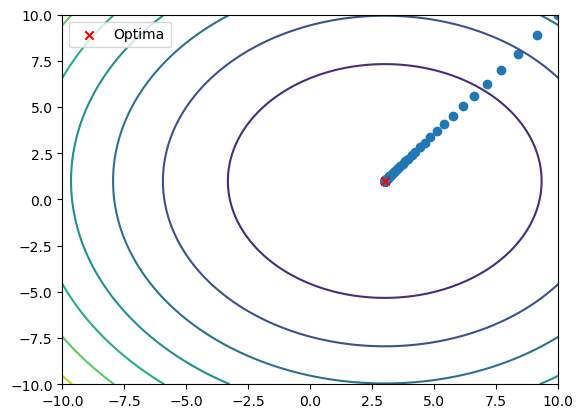

In [21]:
f, grad_f, x_true, in_size = testCase1()
showContour(f, grad_f, x_true, np.array([10, 10]), 1000, 1e-10, 1e-10, None)